In [ ]:
import os
import sys
import numpy as np
from sklearn.linear_model import LinearRegression

root_path = os.path.abspath("..")  
if root_path not in sys.path:
    sys.path.insert(0, root_path)
os.chdir("..")

In [9]:
from data.loader import load_complete_dataset
from data.preprocessing import add_module_columns

dataset = load_complete_dataset()
add_module_columns(dataset)

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,actitivy_label,participant_id,magnetometer_module,gyroscope_module,accelerometer_module
0,1.0,-2.82430,9.1773,2.2388,-1.43340,-0.003309,-0.41384,-0.85484,0.50402,0.674830,1735.1,1.0,14,1.200076,1.491948,9.859601
1,1.0,-2.80020,9.1655,2.2507,-1.04340,0.230960,-0.12186,-0.85887,0.52610,0.674830,1754.6,1.0,14,1.212367,1.075582,9.844448
2,1.0,-2.78810,9.1296,2.2634,-1.12080,0.215210,-0.10277,-0.85081,0.52811,0.683740,1774.2,1.0,14,1.212550,1.145893,9.810509
3,1.0,-2.82400,9.1173,2.2522,-1.15170,0.143390,0.32778,-0.84879,0.50402,0.688200,1793.7,1.0,14,1.203370,1.205991,9.806760
4,1.0,-2.82400,9.1414,2.2517,-1.36180,-0.113230,0.65311,-0.86290,0.51807,0.683740,1813.2,1.0,14,1.216755,1.514554,9.829055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53114,5.0,-0.48220,9.4431,-2.1914,0.70696,-0.734460,1.05760,-0.13535,0.71257,0.069565,1038000.0,1.0,0,0.728639,1.468925,9.706023
53115,5.0,-0.47013,9.4553,-2.1919,0.23155,-0.340820,0.98911,-0.12525,0.67265,0.071739,1038000.0,1.0,0,0.687962,1.071500,9.717415
53116,5.0,-0.49463,9.4428,-2.2155,0.53524,-0.291600,1.00350,-0.11919,0.69461,0.071739,1038000.0,1.0,0,0.708404,1.174106,9.711826
53117,5.0,-0.47013,9.4553,-2.1919,0.23140,-0.326390,0.89815,-0.11313,0.72056,0.084783,1038100.0,1.0,0,0.734298,0.983234,9.717415


In [4]:
def create_sliding_window(data, window_size):
    """Cria janelas deslizantes para séries temporais"""
    assert isinstance(data, np.ndarray), "Erro: 'data' deve ser um numpy.ndarray."
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y).reshape(-1, 1)

In [5]:

def gcv_linear_regression(X, y):
    n, p = X.shape
    model = LinearRegression()
    model.fit(X,y)
    
    y_pred = model.predict(X)
    residuals = y.flatten() - y_pred.flatten()
    rss = np.sum(residuals**2) # Residual Sum of Squares (RSS)
    
    
    XtX_inv = np.linalg.inv(X.T @ X)
    hat_matrix_trace = np.sum((X @ XtX_inv) * X)
    
    gcv = rss / (1 - hat_matrix_trace / n)**2

    return gcv, model

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

def gcv_linear_regression(X, y):
    n, p = X.shape
    
    model = LinearRegression(fit_intercept=True) # Default
    model.fit(X, y)
    
    y_pred = model.predict(X)
    residuals = y.flatten() - y_pred.flatten()
    rss = np.sum(residuals**2)
    hat_matrix_trace = p + 1 
    

    mse = rss / n
    denominator = (1 - hat_matrix_trace / n) ** 2
    
    gcv = mse / denominator

    return gcv, model

In [10]:
dataset.columns

Index(['device_id', 'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
       'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'magnetometer_x',
       'magnetometer_y', 'magnetometer_z', 'timestamp', 'actitivy_label',
       'participant_id', 'magnetometer_module', 'gyroscope_module',
       'accelerometer_module'],
      dtype='object')

In [ ]:
from config.constants import DEVICES


sensor1 = dataset.loc[
    (dataset["device_id"] == DEVICES[0]) & (dataset["actitivy_label"] == 0),
    "accelerometer_module"
].to_numpy()
sensor1original=sensor1.copy()



In [12]:
def create_sliding_window(data, p):
    assert isinstance(data, np.ndarray), "Erro: 'data' deve ser um numpy.ndarray."
    X, y = [], []
    for i in range(len(data) - p):
        X.append(data[i:i+p])
        y.append(data[i+p])
    return np.array(X), np.array(y).reshape(-1, 1)

In [ ]:
import matplotlib.pyplot as plt
from data.data_splitting import split_data_tt

In [16]:
def split_data_temporal(X, test_size=0.3):
    split_point = int(len(X) * (1 - test_size))
    X_train = X[:split_point]
    X_test = X[split_point:]
    return X_train, X_test

1
4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238
241
244
247
250
253
256
259
262
265
268
271
274
277
280
283
286
289
292
295
298
Janela ótima via GCV: 136


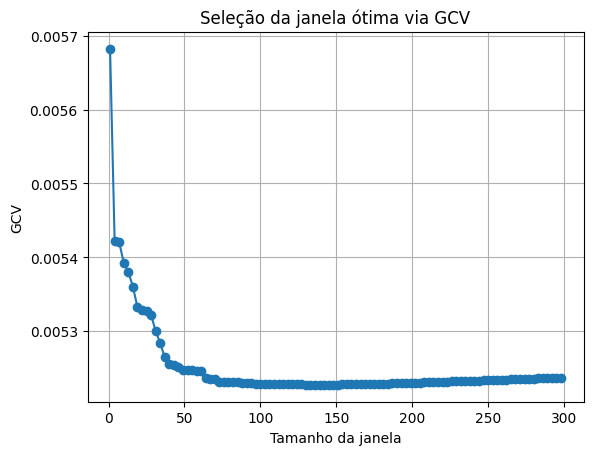

In [ ]:
gcv_scores = []
max_p = range(1,300,3)

data = dataset.loc[
    (dataset["device_id"] == DEVICES[0]) & (dataset["actitivy_label"] == 1),
    "accelerometer_module"
].copy()


split_ponto = int(len(data) * 0.7) # 70% para treino

raw_train = data[:split_ponto]
raw_test = data[split_ponto:]

print(f"Treino bruto: {len(raw_train)} linhas")
print(f"Teste bruto: {len(raw_test)} linhas")

for p in max_p:
    print(p)
    X, y_target = create_sliding_window(raw_train.to_numpy(), p)


    gcv, model = gcv_linear_regression(X, y_target)
    gcv_scores.append(gcv)
    
optimal_window = max_p[np.argmin(gcv_scores)]
print(f"Janela ótima via GCV: {optimal_window}")


plt.plot(max_p, gcv_scores, marker='o')
plt.xlabel("Tamanho da janela")
plt.ylabel("GCV")
plt.title("Seleção da janela ótima via GCV")
plt.grid(True)
plt.show()

### treinar o modelo para a melhor janela

--- A preparar dados ---
Total dados: 162110
Treino Bruto: 113477
--- A aplicar RobustScaler (IQR) ---

--- A testar janelas (p=1 até 300) nos dados escalados ---

>>> RESULTADO GCV <<<
Melhor janela (p): 136
Menor GCV Score: 2.387967

>>> PERFORMANCE REAL (TEST SET SCALED) <<<
MSE (Escalado): 2.310224
R2 Score: 0.7048


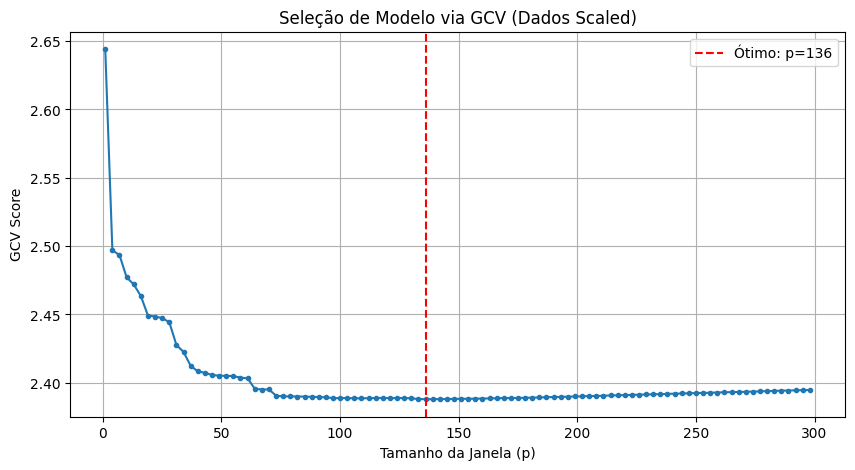

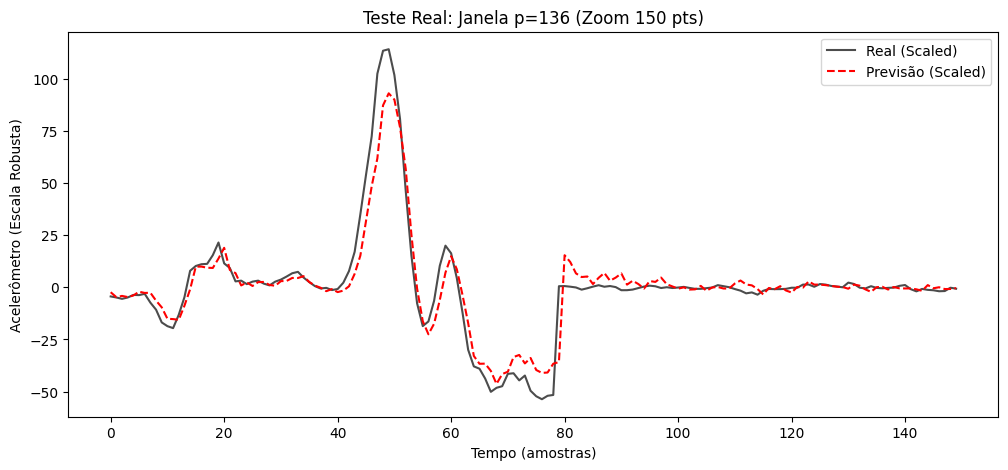

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler # <--- NOVO IMPORT

# ==========================================
# 1. FUNÇÕES AUXILIARES
# ==========================================

def create_sliding_window(data, p):
    """
    Cria a matriz X (lags) e o vetor y (target) para série temporal.
    Esperamos que 'data' seja um array 1D (flattened).
    """
    n = len(data) - p
    if n <= 0:
        raise ValueError(f"Dados insuficientes ({len(data)}) para janela p={p}")
        
    X = np.zeros((n, p))
    y = np.zeros(n)
    
    for i in range(n):
        X[i] = data[i : i + p]  # Os p valores anteriores
        y[i] = data[i + p]      # O valor atual (target)
        
    return X, y

def gcv_linear_regression(X, y):
    """
    Calcula o score GCV para Regressão Linear (OLS).
    """
    n, p_dim = X.shape
    
    # Ajustar modelo
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    
    # Calcular RSS (Residual Sum of Squares)
    y_pred = model.predict(X)
    residuals = y - y_pred
    rss = np.sum(residuals**2)
    
    # Degrees of Freedom (Trace da Matriz Hat)
    hat_trace = p_dim + 1
    
    # Fórmula GCV: MSE / (1 - trace/n)^2
    mse = rss / n
    denominator = (1 - hat_trace / n) ** 2
    
    if denominator <= 0:
        return np.inf, model
        
    gcv = mse / denominator
    return gcv, model

# ==========================================
# 2. PREPARAÇÃO E SCALING (IQR)
# ==========================================

print("--- A preparar dados ---")

# Filtrar dados (Assumindo que dataset e DEVICES existem)
data_series = dataset.loc[
    (dataset["device_id"] == DEVICES[0]) & (dataset["actitivy_label"] == 1),
    "accelerometer_module"
].copy() 

# 1. Split Temporal
split_point = int(len(data_series) * 0.7)
raw_train = data_series[:split_point].to_numpy()
raw_test = data_series[split_point:].to_numpy()

print(f"Total dados: {len(data_series)}")
print(f"Treino Bruto: {len(raw_train)}")

# --- NOVO BLOCO: ROBUST SCALER (IQR) ---
print("--- A aplicar RobustScaler (IQR) ---")

scaler = RobustScaler()

# A. Fit apenas no TREINO e Transformar
# O reshape(-1, 1) é necessário porque o sklearn espera matrizes 2D
# O flatten() no final volta a transformar num array 1D para a nossa função de janela
train_scaled = scaler.fit_transform(raw_train.reshape(-1, 1)).flatten()

# B. Transformar o TESTE usando a escala aprendida no treino
test_scaled = scaler.transform(raw_test.reshape(-1, 1)).flatten()

# ==========================================
# 3. LOOP DE SELEÇÃO (GCV)
# ==========================================

gcv_scores = []
valid_p = [] 
max_p = range(1, 301, 3)

print(f"\n--- A testar janelas (p=1 até 300) nos dados escalados ---")

for p in max_p:
    # Verificação de segurança
    if len(train_scaled) <= p + 5:
        print(f"Parando loop em p={p}: dados insuficientes.")
        break

    try:
        # IMPORTANTE: Usamos 'train_scaled' aqui, não 'raw_train'
        X_train_window, y_train_target = create_sliding_window(train_scaled, p)
        
        gcv, _ = gcv_linear_regression(X_train_window, y_train_target)
        
        gcv_scores.append(gcv)
        valid_p.append(p)
        
    except np.linalg.LinAlgError:
        print(f"Erro numérico em p={p}. Ignorado.")
        gcv_scores.append(np.inf)
        valid_p.append(p)
    except Exception as e:
        print(f"Erro inesperado em p={p}: {e}")

# ==========================================
# 4. AVALIAÇÃO DO VENCEDOR
# ==========================================

best_idx = np.argmin(gcv_scores)
optimal_window = valid_p[best_idx]
min_gcv = gcv_scores[best_idx]

print(f"\n>>> RESULTADO GCV <<<")
print(f"Melhor janela (p): {optimal_window}")
print(f"Menor GCV Score: {min_gcv:.6f}")

# --- PROVA REAL (Usando dados escalados) ---

# 1. Treinar modelo final com TODO o treino escalado
X_final_train, y_final_train = create_sliding_window(train_scaled, optimal_window)
final_model = LinearRegression()
final_model.fit(X_final_train, y_final_train)

# 2. Testar nos dados virgens (Teste Escalado)
X_test_real, y_test_real = create_sliding_window(test_scaled, optimal_window)
y_pred_test = final_model.predict(X_test_real)

# Métricas Finais
mse_real = mean_squared_error(y_test_real, y_pred_test)
r2_real = r2_score(y_test_real, y_pred_test)

print(f"\n>>> PERFORMANCE REAL (TEST SET SCALED) <<<")
print(f"MSE (Escalado): {mse_real:.6f}")
print(f"R2 Score: {r2_real:.4f}")

# ==========================================
# 5. VISUALIZAÇÃO
# ==========================================

# Gráfico 1: Curva do GCV
plt.figure(figsize=(10, 5))
plt.plot(valid_p, gcv_scores, marker='o', markersize=3)
plt.axvline(optimal_window, color='r', linestyle='--', label=f'Ótimo: p={optimal_window}')
plt.xlabel("Tamanho da Janela (p)")
plt.ylabel("GCV Score")
plt.title("Seleção de Modelo via GCV (Dados Scaled)")
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 2: Previsão vs Real (Zoom)
# Nota: O Eixo Y agora estará na escala do RobustScaler (centrado no 0, em unidades de IQR)
plt.figure(figsize=(12, 5))
zoom_slice = slice(0, 150) 

plt.plot(y_test_real[zoom_slice], label="Real (Scaled)", color='black', alpha=0.7)
plt.plot(y_pred_test[zoom_slice], label="Previsão (Scaled)", color='red', linestyle='--')
plt.xlabel("Tempo (amostras)")
plt.ylabel("Acelerômetro (Escala Robusta)")
plt.title(f"Teste Real: Janela p={optimal_window} (Zoom 150 pts)")
plt.legend()
plt.show()

--- A PREPARAR DADOS (Injeção e Scaling) ---
inside
Density of outliers: 0.7299570250652849% | Desired outliers: 10%
Final outlier density: 9.999383134908395%

--- ANÁLISE: O QUE O MODELO ESPERAVA vs O QUE O SENSOR DEU ---


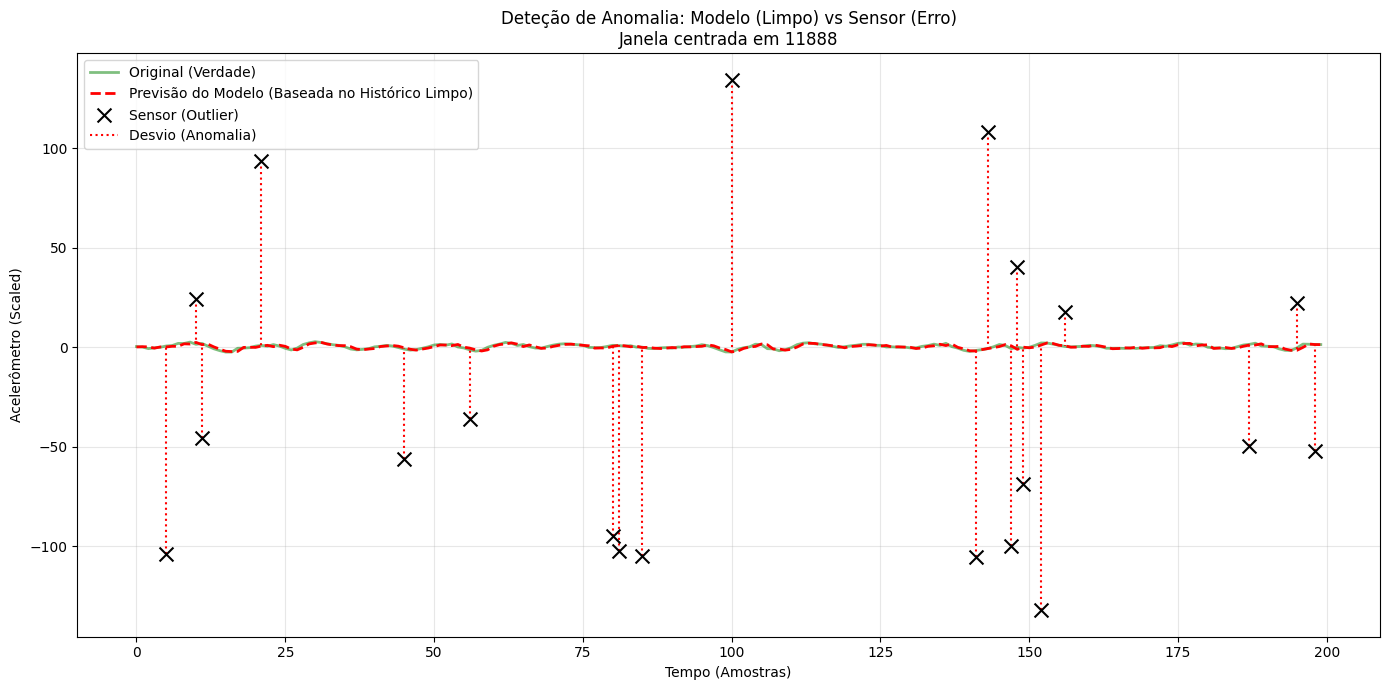

--- Análise do Ponto Crítico ---
1. O Modelo esperava: -2.39
2. O Sensor reportou: 134.45
3. Desvio (Erro):     136.84
CONCLUSÃO: Como o desvio é enorme, o sistema pode marcar isto como um erro e descartar.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# 1. PREPARAÇÃO DOS DADOS (GERAR AS VARIÁVEIS EM FALTA)
# ==============================================================================
print("--- A PREPARAR DADOS (Injeção e Scaling) ---")

# A. Injetar Outliers (Gera a mask e o dado ruidoso)
# Usamos os parâmetros que definimos antes: 10% de outliers, z=20
mask_2d, raw_noisy_2d = inject_outliers(raw_test, x=10, k=3, z=0.5)

# Flatten (Converter para 1D para facilitar)
raw_clean = raw_test.flatten()
raw_noisy = raw_noisy_2d.flatten()
mask_outliers = mask_2d.flatten() # <--- Aqui está a mask_outliers

# B. Scaling (Aplicar o RobustScaler já treinado)
clean_scaled = scaler.transform(raw_clean.reshape(-1, 1)).flatten() # <--- Aqui está o clean_scaled
noisy_scaled = scaler.transform(raw_noisy.reshape(-1, 1)).flatten() # <--- Aqui está o noisy_scaled

# ==============================================================================
# 2. VISUALIZAÇÃO: PREVISÃO IDEAL VS OUTLIER (O TEU CÓDIGO)
# ==============================================================================

print("\n--- ANÁLISE: O QUE O MODELO ESPERAVA vs O QUE O SENSOR DEU ---")

# 1. PREPARAR JANELAS
# Agora usamos o CLEAN para criar o X. O modelo não vê o ruído no histórico.
X_clean_test, y_clean_target = create_sliding_window(clean_scaled, optimal_window)

# O target ruidoso serve apenas para comparação visual (para ver o erro)
_, y_noisy_target = create_sliding_window(noisy_scaled, optimal_window)

# 2. FAZER A PREVISÃO "IDEAL"
# O modelo prevê com base num histórico perfeito
y_pred_ideal = final_model.predict(X_clean_test)

# 3. PREPARAR A VISUALIZAÇÃO
# Alinhar a máscara (cortar o warm-up para alinhar com as janelas)
mask_aligned = mask_outliers[optimal_window:]
indices_erros = np.where(mask_aligned)[0]

if len(indices_erros) > 0:
    # Escolher o pior erro para centrar o gráfico
    diferencas = np.abs(y_noisy_target[indices_erros] - y_clean_target[indices_erros])
    idx_centro = indices_erros[np.argmax(diferencas)]
    
    # Janela de Zoom (100 pontos para cada lado)
    raio = 100
    inicio = max(0, idx_centro - raio)
    fim = min(len(y_pred_ideal), idx_centro + raio)
    
    # Recortes
    slice_clean = y_clean_target[inicio:fim]
    slice_noisy = y_noisy_target[inicio:fim]
    slice_pred  = y_pred_ideal[inicio:fim]  # Previsão baseada em dados limpos
    slice_mask  = mask_aligned[inicio:fim]
    
    # Eixo X local
    eixo_x = np.arange(len(slice_clean))
    
    # Identificar pontos de erro neste slice
    indices_locais = np.where(slice_mask)[0]
    
    # ==========================================
    # PLOT
    # ==========================================
    plt.figure(figsize=(14, 7))
    
    # A. A REALIDADE (Verde)
    plt.plot(eixo_x, slice_clean, color='green', label='Original (Verdade)', linewidth=2, alpha=0.5)
    
    # B. A PREVISÃO DO MODELO (Vermelho)
    # Como o input é limpo, esta linha deve seguir a verde muito de perto
    plt.plot(eixo_x, slice_pred, color='red', label='Previsão do Modelo (Baseada no Histórico Limpo)', linewidth=2, linestyle='--')
    
    # C. O SENSOR COM DEFEITO (Apenas os pontos outliers)
    if len(indices_locais) > 0:
        # X Preto: Onde o sensor foi parar
        plt.scatter(eixo_x[indices_locais], slice_noisy[indices_locais], 
                    color='black', marker='x', s=100, zorder=10, label='Sensor (Outlier)')
        
        # Linha Vermelha Vertical: A discrepância (Resíduo)
        # Mostra a distância entre o que o modelo esperava (Vermelho) e o que o sensor deu (Preto)
        plt.vlines(eixo_x[indices_locais], slice_noisy[indices_locais], slice_pred[indices_locais], 
                   colors='red', linestyles=':', label='Desvio (Anomalia)')

    plt.title(f"Deteção de Anomalia: Modelo (Limpo) vs Sensor (Erro)\nJanela centrada em {idx_centro}")
    plt.xlabel("Tempo (Amostras)")
    plt.ylabel("Acelerômetro (Scaled)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print numérico
    if len(indices_locais) > 0:
        idx_pico = indices_locais[np.argmax(np.abs(slice_noisy[indices_locais] - slice_clean[indices_locais]))]
        val_esperado = slice_pred[idx_pico]
        val_sensor = slice_noisy[idx_pico]
        desvio = abs(val_sensor - val_esperado)
        
        print(f"--- Análise do Ponto Crítico ---")
        print(f"1. O Modelo esperava: {val_esperado:.2f}")
        print(f"2. O Sensor reportou: {val_sensor:.2f}")
        print(f"3. Desvio (Erro):     {desvio:.2f}")
        print("CONCLUSÃO: Como o desvio é enorme, o sistema pode marcar isto como um erro e descartar.")

else:
    print("Não foram encontrados erros na zona de previsão.")